## EM-212 Applied Data Science
## Hypothesis testing

This is a jupyter-notebook implementation and walkthrough of hypothesis testing with a real-life example. The notebook covers the following -
* Randomly generating sample data 
* How to sample from a dataset
* Performing a t-test to compare two samples from a population
* The assumptions we are making about samples when we use a t-test
* How to apply this to real data (TikTok songs)


In [17]:
from scipy import stats
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 

#setting seed 
random.seed(212)

### T-test

* Null hypothesis H0: Checking for mean of the population is a given value
* Distributions: Normal distribution (stats.norm) 
* SciPy Functions for T-Test: stats.ttest_1samp

In [7]:
# Generating the population distribution from a known mean

mu0 = 1.0 # the null hypothesis that the population mean is equal to mu0
mu = 0.8 # the true population mean generated
sigma = 0.5 # the true, known population standard deviation
X = stats.norm(mu, sigma) # generate the population distribution from a standard normal distribution with the population parameters
n = 100 # number of samples to draw from the population
X_samples = X.rvs(n) # draw a sample from the population

* given $X_{samples}$ we need to compute a test statistic
* if the population standard deviation $\sigma$ is known, as in this example, we can use
* <font size="5"> $t = \frac{\bar{x}- \mu_0}{\sigma/\sqrt{n}}$. </font>
* Note that if the population standard deviation is not known, we compute the sample standard deviation instead
* This is all taken care of by the scipy function

* Because we are testing the mean of the sample to the mean of a the population we use `stats.ttest_1samp` which is for testing with a single population parameter

**Hypothesis testing for single population parameter**

In [8]:
t, p = stats.ttest_1samp(X_samples, mu) # returns the test statistic and the p-value. note we generally have 5% or 0.05 significance value.

In [9]:
t, p

(0.9548454307037728, 0.3419816012020762)

* Because 0.34 > 0.05, we have a result that is not statistically significant 
* **This mean we fail to reject the Null Hypothesis that the population mean is equal to 1.0**
* Again note that the true population mean we used to generate the population data is **0.8**
* This function performed a 2-tailed test

**Hypothesis testing for two sample means**

In [7]:
n, sigma = 50, 1.0 # sample size, and the standard deviation
mu1, mu2 = np.random.rand(2) # means of sample 1 and sample2
X1 = stats.norm(mu1, sigma) # create normal distribution for population from which to draw sample 1
X1_sample = X1.rvs(n) # draw sample 1 with sample size n=50 with default standard deviation = 1 and mean mu1
X2 = stats.norm(mu2, sigma) # create normal distribution for population from which to draw sample 1
X2_sample = X2.rvs(n) # draw sample 2 with sample size n=50 with default standard deviation = 1 and mean mu2

* Our Null Hypothesis is that our two samples derive from the sample population
* Let's use a scipy function to perform the hypothesis testing

In [8]:
t, p = stats.ttest_ind(X1_sample, X2_sample)

In [9]:
t, p # t is the test statistic and p is the p-value

(-1.5769281817189138, 0.1180347544605434)

* We are using the common significance level of 5% or 0.05
* Because **p** > **0.05** we fail to reject the null hypothesis that the two samples derive from different population means
* We don't have sufficient evidence to suggest that they derive from different population
* And because we generated this data from a known population we selected ourselves, we know our conclusion is correct 

### Applying T-test on TikTok Data


Dataset of common TikTok songs, and we want to test the idea that Doja Cat's songs are more dancable. 

In [10]:
import pandas as pd  
import seaborn as sns 

tiktok_data = pd.read_csv('data/tiktok.csv') # This assumes you have also downloaded and unzipped the Data folder
tiktok_data.head(2)

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,playlist_id,playlist_name,duration_mins,genre
0,6kVuF2PYLuvl9T85XjNbaO,Lay It Down Gmix - Main,1Xfmvd48oOhEWkscWyEbh9,Lloyd,43C6GVlhXG4KfZuEbxty3r,302186,2011-01-01,28,0.597,0.800,...,0.3120,0.0461,0.0,0.180,0.565,155.932,6kVuF2PYLuvl9T85XjNbaO,6kVuF2PYLuvl9T85XjNbaO,5.036433,TIKTOK DANCE
1,1RGIjMFMgJxkZHMDXVYzOJ,Bartender (feat. Akon),3aQeKQSyrW4qWr35idm0cy,T-Pain,6CrSEKCF4TYrbSIitegb3h,238800,2007-06-05,75,0.832,0.391,...,0.0628,0.0564,0.0,0.224,0.436,104.961,1RGIjMFMgJxkZHMDXVYzOJ,1RGIjMFMgJxkZHMDXVYzOJ,3.980000,TIKTOK DANCE


In [12]:
tiktok_data['doja_or_noja'] = tiktok_data.artist_name=='Doja Cat' # Create a column that stores if it is Doja Cat or not. 
tiktok_data.doja_or_noja.value_counts()

doja_or_noja
False    6654
True       92
Name: count, dtype: int64

In [13]:
doja_X1 = tiktok_data[tiktok_data.doja_or_noja==False]
doja_X2 = tiktok_data[tiktok_data.doja_or_noja==True]

In [14]:
print(doja_X1.danceability.mean(), doja_X1.danceability.std()) # First we check the measures of central tendency to see if there is a relationship. 

0.740349113315299 0.13855559675060644


In [15]:
print(doja_X2.danceability.mean(), doja_X2.danceability.std())

0.7826739130434784 0.07237146373082283


We can also use a similar `t-test` based approach in order to answer our hypothesis - are Doja Cat songs just more danceable than other songs popular on TikTok? 

In [15]:
t, p = stats.ttest_ind(doja_X1.danceability, doja_X2.danceability)

In [16]:
t, p # t is the test statistic and p is the p-value

(-2.9243151497279807, 0.0034636445170658807)

We seem to find a significant result! Great! 

Open Questions -

* What problems do you see with this approach? 

* What specific assumptions are we making about the data? 

* What are the differences between the Doja Cat and non-Doja Cat songs? 



In [5]:
print("Not Doja", doja_X1.danceability.mean(), doja_X1.danceability.std())
print("Doja", doja_X2.danceability.mean(), doja_X2.danceability.std())

Not Doja 0.7403491133152982 0.13855559675060572
Doja 0.7826739130434784 0.07237146373082283


It is sometimes easier to look visually. 

<Axes: xlabel='danceability', ylabel='Count'>

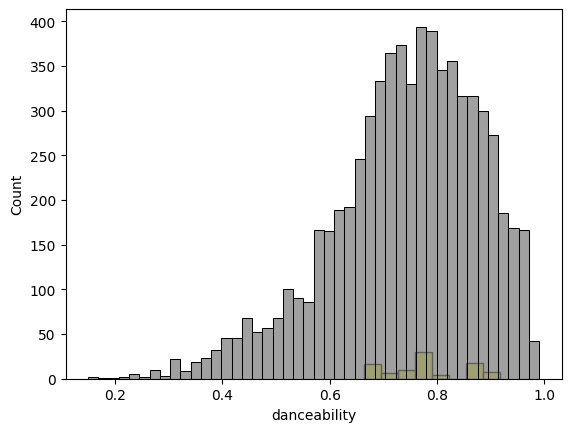

In [20]:

import seaborn as sns 

sns.histplot(doja_X2.danceability,multiple='stack',color='yellow')
sns.histplot(doja_X1.danceability,multiple='stack',color='grey')


In [21]:
# We could address this with a Mann-Whitney U test

from scipy.stats import mannwhitneyu
t, p = mannwhitneyu(doja_X1.danceability, doja_X2.danceability)
print("Mann-Whitney U test",t,p)


Mann-Whitney U test 261842.0 0.017093534050211606


### Next steps & summary:
Other tests from UCLA - https://stats.oarc.ucla.edu/sas/whatstat/what-statistical-analysis-should-i-usestatistical-analyses-using-sas/
    